In [102]:
%%HTML
<script src="require.js"></script>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [103]:
import plotly.io as pio
pio.renderers.default='notebook'

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.figure_factory as ff

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# To display the graphs
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Understanding the structure of the data

In [104]:
# giving colab access to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# importing the data
df = pd.read_csv('/content/drive/MyDrive/DS&BA @ UTA/Module 1/Project - FoodHub/foodhub_order.csv')
# returning the first 5 rows to check all data was correclty imported
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary.
* Data in each row corresponds to the order placed by a customer.
* Data seems correctly imported.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [106]:
# looking at the total columns and rows of the df
df.shape

(1898, 9)

#### Observations:
* There are 1,898 rows and 9 columns in the data set.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [107]:
# printing the information summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are no missing values in any of the columns.
* There are 4 object columns including 'rating', and 5 numeric columns


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [108]:
# looking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [109]:
# looking at the descriptive overview of the data
df.describe(include='all').T

count unique          top  freq       mean       std  \
order_id              1898.00    NaN          NaN   NaN 1477495.50    548.05   
customer_id           1898.00    NaN          NaN   NaN  171168.48 113698.14   
restaurant_name          1898    178  Shake Shack   219        NaN       NaN   
cuisine_type             1898     14     American   584        NaN       NaN   
cost_of_the_order     1898.00    NaN          NaN   NaN      16.50      7.48   
day_of_the_week          1898      2      Weekend  1351        NaN       NaN   
rating                   1898      4    Not given   736        NaN       NaN   
food_preparation_time 1898.00    NaN          NaN   NaN      27.37      4.63   
delivery_time         1898.00    NaN          NaN   NaN      24.16      4.97   

                             min        25%        50%        75%        max  
order_id              1476547.00 1477021.25 1477495.50 1477969.75 1478444.00  
customer_id              1311.00   77787.75  128600.00  270525.00  405334.00  
restaurant_name              NaN        NaN        NaN        NaN        NaN  
cuisine_type                 NaN        NaN        NaN        NaN        NaN  
cost_of_the_order           4.47      12.08      14.14      22.30      35.41  
day_of_the_week              NaN        NaN        NaN        NaN        NaN  
rating                       NaN        NaN        NaN        NaN        NaN  
food_preparation_time      20.00      23.00      27.00      31.00      35.00  
delivery_time              15.00      20.00      25.00      28.00      33.00

#### Observations:
* The average time for food preparation is 27 minutes, with the minimum time being 20 minutes and the maximum being 35 minutes
* The average cost per order is 16.5 dollars, with the minimum being 4.47 and the maximum being 35.41
* The average delivery time is 24 minutes, with the minimum time being 15 minutes and the maximum being 33 minutes




### **Question 5:** How many orders are not rated? [1 mark]

In [110]:
# looking at the count of each rating value 
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* Out of 1898 orders, 736 were not rated. This constitutes 38.7% of the total, which is the topmost recurring value.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [111]:
fig=px.histogram(df, x='cost_of_the_order')
fig.show()
fig=px.box(df, x='cost_of_the_order')
fig.show()

* The median cost for the orders is 14, with 75% of the orders being less than 22.3
* The minimum cost is 4.47 and the maximum is 35.4.
* Orders with costs ranging between 12 and 13 dollars have the highest recurrences (340 total orders).

In [112]:
fig=px.histogram(df, x='food_preparation_time')
fig.show()
fig=px.box(df, x='food_preparation_time')
fig.show()

* Food preparation time ranges from 20 to 35 minutes.
* The data is equally distributed for the most part.

In [113]:
fig=px.histogram(df, x='delivery_time')
fig.show()
fig=px.box(df, x='delivery_time')
fig.show()

* 50% of the orders had a delivery time between 20 and 28 minutes.
* The minimum delivery time was 15 minutes and the maximum was 33.

In [114]:
fig=px.histogram(df, x='restaurant_name')
fig.show()

In [115]:
# calculating the percentages of orders from each restaurant
df.restaurant_name.value_counts()*100 / len(df)

Shake Shack                 11.54
The Meatball Shop            6.95
Blue Ribbon Sushi            6.27
Blue Ribbon Fried Chicken    5.06
Parm                         3.58
                             ... 
Sushi Choshi                 0.05
Dos Caminos Soho             0.05
La Follia                    0.05
Philippe Chow                0.05
'wichcraft                   0.05
Name: restaurant_name, Length: 178, dtype: float64

* Shake Shack is the number one restaurant with 219 orders (11.5%).
* The Meatball Shop and Blue Ribbon Sushi follow second place with 132(6.9%) and 119(6.2%) orders respectively.
* Blue Ribbon Fried Chicken is in fourth place with 96 orders (5%).

In [116]:
fig=px.histogram(df, x='cuisine_type')
fig.show()

In [117]:
# calculating the percentages of orders from each type of cuisine
df.cuisine_type.value_counts()*100 / len(df)

American         30.77
Japanese         24.76
Italian          15.70
Chinese          11.33
Mexican           4.06
Indian            3.85
Middle Eastern    2.58
Mediterranean     2.42
Thai              1.00
French            0.95
Southern          0.90
Korean            0.68
Spanish           0.63
Vietnamese        0.37
Name: cuisine_type, dtype: float64

* 30% of the orders come from American cuisine, followed by Japanese with 24.7% and Italian in third place with 15.7%.
* Chinese cuisine is the fourth most popular cuisine with 11.3%.

In [118]:
fig=px.histogram(df, x='day_of_the_week')
fig.show()

In [119]:
# calculating the percentages of orders depending on the days of the week
df.day_of_the_week.value_counts()*100 / len(df)

Weekend   71.18
Weekday   28.82
Name: day_of_the_week, dtype: float64

* 71% of orders are made on weekends (Saturdays and Sundays), while only 29% are made during weekdays.

In [120]:
fig=px.histogram(df, x='rating')
fig.show()

In [121]:
# calculating the percentages for each type of rating given
df['rating'].value_counts()*100 / len(df)

Not given   38.78
5           30.98
4           20.34
3            9.91
Name: rating, dtype: float64

* As stated before, most orders weren't ranked (38.7%).
* 30.9% of the orders were ranked with 5 stars, 20.2% were ranked 4 stars, and the remaining 9.9% were ranked with 3 stars.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [122]:
# calculating the total number of orders from each restaurant
rest_name = ['restaurant_name']
for column in rest_name:
    print(df[column].value_counts(ascending=False))

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


#### Observations:
* As seen before, Shake Shack is the number one restaurant with a total of 219 orders, followed by The Meatball Shop with 132, Blue Ribbon Sushi with 119, Blue Ribbon Fried Chicken with 96, and finally in fifth place Parm with 68 orders.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [123]:
# calculating the total number of orders from each type of cuisine
df['cuisine_type'].value_counts(ascending=False)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [124]:
# calculating the total number of orders during weekends from each type of cuisine
df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts(ascending=False)

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* American cuisine is the most popular overall, with 71% of their orders being made on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [125]:
# getting the sum of all orders with a cost over 20
df.loc[df['cost_of_the_order']>20].shape

(555, 9)

In [126]:
# getting total of orders
df.shape

(1898, 9)

In [127]:
# getting the % of orders over 20
orders_over_twenty=(555/1898)*100
print(orders_over_twenty)

29.24130663856691


#### Observations:
* Only 29% of orders have a total cost of over 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [128]:
# getting the mean of the delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* The average delivery time is 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [129]:
# finding the top most recurring users
df['customer_id'].value_counts(ascending=False)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
* Customer ID 52832 is the most frequent user with a total of 13 orders, followed by Customer ID 47440 with 10 orders and Customer ID 83287 with 9.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


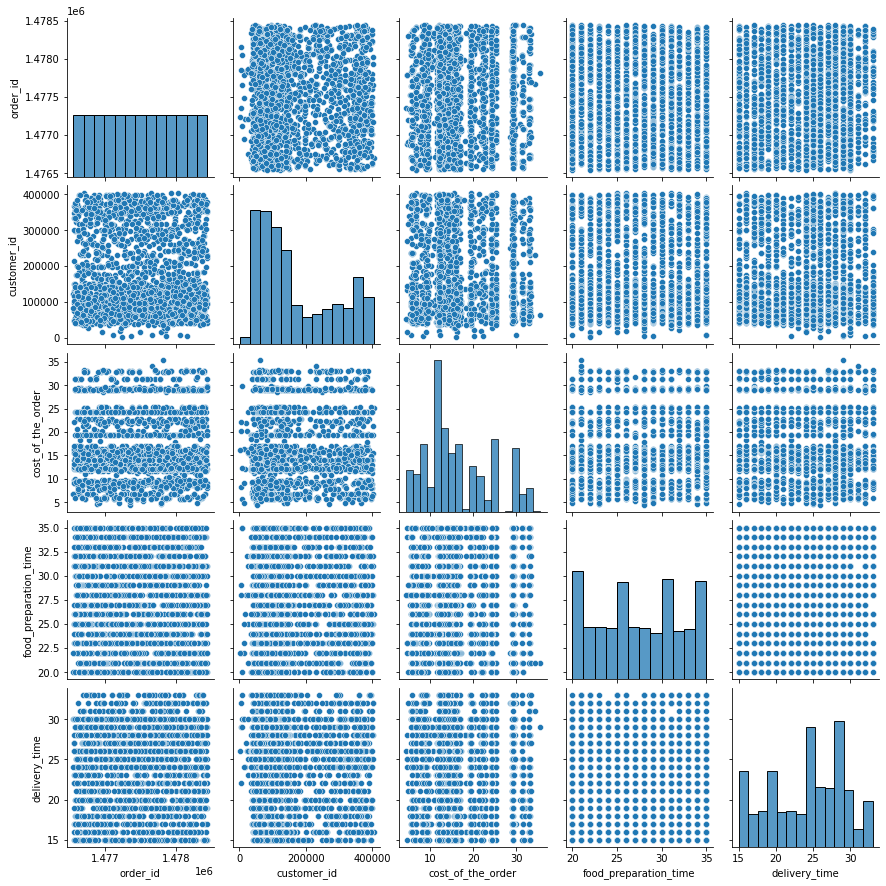

In [130]:
# corr analysis between numerical variables
sns.pairplot(df)
plt.show()

* There's no correlation between any of the numerical variables.

In [131]:
fig=px.box(df,x='cuisine_type',y='cost_of_the_order')
fig.show()

In [132]:
fig=px.scatter(df,x='cuisine_type',y='cost_of_the_order', color='day_of_the_week')
fig.show()

* French cuisine has the highest median price (20.47 dollars) and Vietnamese the lowest (12 dollars).
* The most expensive order comes from a Mediterranean restaurant (35.4 dollars) and the cheapest one comes from a Japanese restaurant (4.47 dollars).
* Spanish and Korean cuisine only have one order each made on a weekend, with most of their orders being placed during weekdays.
* Costs of the orders between the four most popular cuisines (American, Japanese, Italian and Chinese) tend to be very similar to each other.
* Day of the week doesn't seem to have an impact on the cost of the order.



In [133]:
fig=px.box(df,x='cuisine_type',y='food_preparation_time')
fig.show()

* Most couisines have a similar range of food preparation time.

In [134]:
fig=px.scatter(df,x='cuisine_type',y='food_preparation_time', color='day_of_the_week')
fig.show()

* Day of the week doesn't seem to have an impact on food preparation time.


In [135]:
fig=px.box(df,x='cuisine_type',y='delivery_time')
fig.show()

* Most cuisines have a similar delivery time, but French and Vietnamese cuisines tend to be a little higher. This is most likely due to few order counts (little data to look at) and could be related to the distance between the restaurants and their destinations.

In [136]:
fig=px.scatter(df,x='cuisine_type',y='delivery_time', color='day_of_the_week')
fig.show()

In [137]:
fig=px.box(df,x='day_of_the_week',y='delivery_time')
fig.show()

* We can see that day of the week does have a significant impact on the delivery time.
* During weekdays the delivery time tends to be higher, ranging from 24 to 33 minutes. 
* Delivery time during weekends can be as low as 15 minutes, with 50% of the orders being under 22, while 75% of orders placed on weekdays have a delivery time over 26.

In [138]:
fig=px.histogram(df,x='cuisine_type',color='day_of_the_week')
fig.show()

* Most orders are made during weekends, averaging around 59.5% of the total orders for each cuisine.

In [139]:
fig=px.histogram(df,x='cuisine_type',color='rating')
fig.show()

In [140]:
# looking at the count of 5 stars ratings given per cuisine
df.loc[df['rating']=='5','cuisine_type'].value_counts(ascending=False)

American          174
Japanese          142
Italian            90
Chinese            69
Indian             32
Mexican            26
Mediterranean      16
Middle Eastern     13
Thai                6
Southern            5
Spanish             5
French              5
Korean              3
Vietnamese          2
Name: cuisine_type, dtype: int64

In [141]:
# looking at the count of 4 stars ratings given per cuisine
df.loc[df['rating']=='4','cuisine_type'].value_counts(ascending=False)

American          130
Japanese           91
Italian            54
Chinese            40
Mexican            16
Middle Eastern     16
Indian             13
Southern            7
Mediterranean       7
Korean              4
Thai                3
French              3
Vietnamese          1
Spanish             1
Name: cuisine_type, dtype: int64

In [142]:
# looking at the count of 3 stars ratings given per cuisine
df.loc[df['rating']=='3','cuisine_type'].value_counts(ascending=False)

American          64
Japanese          40
Italian           28
Chinese           24
Mediterranean      9
Mexican            6
Indian             5
Middle Eastern     5
French             2
Korean             2
Vietnamese         2
Southern           1
Name: cuisine_type, dtype: int64

In [143]:
# looking at the count of not rated orders per cuisine
df.loc[df['rating']=='Not given','cuisine_type'].value_counts(ascending=False)

American          216
Japanese          197
Italian           126
Chinese            82
Mexican            29
Indian             23
Middle Eastern     15
Mediterranean      14
Thai               10
French              8
Spanish             6
Korean              4
Southern            4
Vietnamese          2
Name: cuisine_type, dtype: int64

* Out of the rated orders, 5 stars was the most frequently given value to most cuisines.

In [144]:
fig=px.histogram(df,x='restaurant_name',y='cost_of_the_order')
fig.show()

In [145]:
# looking for the average cost per order from Shake Shack
df.loc[df['restaurant_name']=='Shake Shack','cost_of_the_order'].mean()

16.34488584474886

* Shake Shack made a total revenue of 3,579.5 dollars from FoodHub orders, with an average cost of 16.3 dollars per order.


In [146]:
fig=px.box(df,x='day_of_the_week',y='cost_of_the_order')
fig.show()

* Day of the week doesn't impact how much people spend on food delivery.

In [147]:
fig=px.box(df,x='rating',y='cost_of_the_order')
fig.show()

In [148]:
# looking at the average cost of orders depending on the rating given
df.groupby(['rating'])[['cost_of_the_order']].mean()

cost_of_the_order
rating                      
3                      16.22
4                      16.71
5                      16.97
Not given              16.09

* Cost of the order doesn't have a meaningful impact on the rating given.

In [149]:
fig=px.histogram(df,x='day_of_the_week',color='rating')
fig.show()

* Ratings given to orders placed on weekends are closely proportional to those given on weekdays.

In [150]:
fig=px.box(df,x='rating',y='food_preparation_time')
fig.show()

In [151]:
# looking at the average food preparation time categorized by rating
df.groupby(['rating'])[['food_preparation_time']].mean()

food_preparation_time
rating                          
3                          27.43
4                          27.40
5                          27.36
Not given                  27.36

In [152]:
fig=px.box(df,x='rating',y='delivery_time')
fig.show()

In [153]:
# looking at the average delivery time categorized by rating
df.groupby(['rating'])[['delivery_time']].mean()

delivery_time
rating                  
3                  24.56
4                  23.87
5                  24.21
Not given          24.17

In [154]:
# creating new column with the total time of an order, from the time it's placed to when it gets to it's destination
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
df['total_time'] = df['total_time'].astype(int)

In [155]:
# making sure the column was added correctly
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  total_time  
0             20          45  
1             23          48  
2             28          51  
3             15          40  
4             24          49

In [156]:
fig=px.box(df,x='rating',y='total_time')
fig.show()

In [157]:
# looking at the average total time categorized by rating
df.groupby(['rating'])[['total_time']].mean()

total_time
rating               
3               51.99
4               51.26
5               51.57
Not given       51.53

* Overall, orders rated 3 starts tend to take a bit longer, though this is not a significant time change compared to the rest.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [158]:
# looking at the types of 'rating' and their count
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [159]:
# replacing ''Not given' values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# changing the data type to float
df['rating'] = df['rating'].astype(float)

In [160]:
# returning the different types of cuisines
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [161]:
# looking at American restaurants and their rating count
df.loc[df['cuisine_type']=='American'].groupby("restaurant_name")["rating"].count()

restaurant_name
'wichcraft                       1
5 Napkin Burger                  2
67 Burger                        1
Alidoro                          0
Bareburger                      17
Big Daddy's                      2
Blue Ribbon Brooklyn             3
Blue Ribbon Fried Chicken       64
Bubby's                          2
Burger Joint                     8
Cafeteria                        4
Delicatessen                     3
Dickson's Farmstand Meats        3
Dig Inn Seasonal Market          1
Dirty Bird To Go (archived)      1
Dirty Bird to Go                 2
DuMont Burger                    2
Five Guys Burgers and Fries     18
Five Leaves                      2
Friend of a Farmer               0
J. G. Melon                     12
Lucky Strike                     1
Lucky's Famous Burgers           4
Market Table                     0
Melt Shop                        9
Moonstruck on Second             1
P.J. Clarke's                   10
Rye House                        1
S'MA

In [162]:
# looking at Blue Ribbon Fried Chicken and its average rating 
df.loc[df['restaurant_name']=='Blue Ribbon Fried Chicken'].groupby("restaurant_name")["rating"].mean()

restaurant_name
Blue Ribbon Fried Chicken   4.33
Name: rating, dtype: float64

In [163]:
# looking at Shake Shack and its average rating 
df.loc[df['restaurant_name']=='Shake Shack'].groupby("restaurant_name")["rating"].mean()

restaurant_name
Shake Shack   4.28
Name: rating, dtype: float64

The next American restaurants qualify for the promotion:
* Blue Ribbon Fried Chicken
* Shake Shack

In [164]:
# looking at Korean restaurants and their rating count
df.loc[df['cuisine_type']=='Korean'].groupby("restaurant_name")["rating"].count()

restaurant_name
Cho Dang Gol                  5
Don's Bogam BBQ & Wine Bar    2
Hangawi                       0
Kori Restaurant and Bar       1
Woorijip                      1
Name: rating, dtype: int64

No Korean restaurants qualify for the promotion.

In [165]:
# looking at Japanese restaurants and their rating count
df.loc[df['cuisine_type']=='Japanese'].groupby("restaurant_name")["rating"].count()

restaurant_name
Asuka Sushi                       2
Benihana                          2
Blue Ribbon Sushi                73
Blue Ribbon Sushi Bar & Grill    22
Blue Ribbon Sushi Izakaya        18
Donburi-ya                        3
Go! Go! Curry!                    2
Haru Gramercy Park                1
Hatsuhana                         5
Hibino                            1
Hiroko's Place                    0
Izakaya Ten                       2
Kambi Ramen House                 1
Kanoyama                          2
Mira Sushi                        1
Momoya                           22
Nobu Next Door                   23
Samurai Mama                      1
Sushi Choshi                      1
Sushi Samba                       8
Sushi of Gari                     7
Sushi of Gari 46                 17
Sushi of Gari Tribeca            13
TAO                              28
Taro Sushi                        1
Terakawa Ramen                    2
The Loop                          3
Yama 49     

In [166]:
# looking at Blue Ribbon Sushi and its average rating 
df.loc[df['restaurant_name']=='Blue Ribbon Sushi'].groupby("restaurant_name")["rating"].mean()

restaurant_name
Blue Ribbon Sushi   4.22
Name: rating, dtype: float64

Blue Ribbon Sushi is the only Japanese restaurant that qualifies for the promotion.

In [167]:
# looking at Mexican restaurants and their rating count
df.loc[df['cuisine_type']=='Mexican'].groupby("restaurant_name")["rating"].count()

restaurant_name
Cafe Habana                              11
Cafe de La Esquina                        1
Chipotle Mexican Grill $1.99 Delivery    15
Crema Restaurante                         0
Dos Caminos                               4
Dos Caminos Soho                          1
El Parador Cafe                           1
Empanada Mama (closed)                    9
Mission Cantina                           2
Tortaria                                  2
Tres Carnes                               2
Name: rating, dtype: int64

No Mexican restaurants qualify for the promotion.

In [168]:
# looking at Indian restaurants and their rating count
df.loc[df['cuisine_type']=='Indian'].groupby("restaurant_name")["rating"].count()

restaurant_name
Amma                              2
Anjappar Chettinad                1
Bhatti Indian Grill               1
Bukhara Grill                     2
Chola Eclectic Indian Cuisine     1
Chote Nawab                       1
Haandi                            1
Haveli Indian Restaurant          2
Junoon                            3
Saravanaa Bhavan                  3
Tamarind TriBeCa                 20
The Kati Roll Company            10
The MasalaWala                    1
indikitch                         2
Name: rating, dtype: int64

No Indian restaurants qualify for the promotion.

In [169]:
# looking at Italian restaurants and their rating count
df.loc[df['cuisine_type']=='Italian'].groupby("restaurant_name")["rating"].count()

restaurant_name
Aurora                           0
Bistango                         0
Carmine's                        2
Cipriani Le Specialita           1
Coppola's East                   0
Emporio                          0
Frank Restaurant                 1
Gaia Italian Cafe                0
Galli Restaurant                 1
Il Bambino                       1
La Follia                        0
Lamarca Pasta                    0
Le Zie 2000 Trattoria            0
Olive Garden                     1
Osteria Morini                   6
Otto Enoteca Pizzeria            7
Parm                            39
Paul & Jimmy's                   0
Pepe Giallo                      1
Pepe Rosso To Go                 5
Piccolo Angolo                   1
Posto                            0
Rubirosa                        24
Serafina Fabulous Pizza          4
Tarallucci e Vino Restaurant     0
The Meatball Shop               70
Tony's Di Napoli                 3
UVA Wine Bar & Restaurant        1
Vezz

In [170]:
# looking at The Meatball Shop and its average rating 
df.loc[df['restaurant_name']=='The Meatball Shop'].groupby("restaurant_name")["rating"].mean()

restaurant_name
The Meatball Shop   4.51
Name: rating, dtype: float64

The Meatball Shop is the only Italian restaurant that qualifies for the promotion.

In [171]:
# looking at Mediterranean restaurants and their rating count
df.loc[df['cuisine_type']=='Mediterranean'].groupby("restaurant_name")["rating"].count()

restaurant_name
Barbounia             4
Jack's Wife Freda    19
Mamoun's Falafel      4
Olea                  1
Pylos                 4
Name: rating, dtype: int64

No Mediterranean restaurants qualify for the promotion.

In [172]:
# looking at Chinese restaurants and their rating count
df.loc[df['cuisine_type']=='Chinese'].groupby("restaurant_name")["rating"].count()

restaurant_name
Big Wong Restaurant _¤¾Ñ¼      0
CafÌ© China                     4
Grand Sichuan International     2
Han Dynasty                    23
Hot Kitchen                     2
Hunan Manor                     1
Joe's Shanghai _Àü£¾÷´        4
Philippe Chow                   1
Prosperity Dumpling             2
RedFarm Broadway               41
RedFarm Hudson                 34
Vanessa's Dumpling House        5
Vanessa's Dumplings             6
Wa Jeal                         0
Wo Hop Restaurant               1
Xi'an Famous Foods              7
Name: rating, dtype: int64

No Chinese restaurants qualify for the promotion.

In [173]:
# looking at Middle Eastern restaurants and their rating count
df.loc[df['cuisine_type']=='Middle Eastern'].groupby("restaurant_name")["rating"].count()

restaurant_name
12 Chairs                2
Balade                   1
Byblos Restaurant        1
Cafe Mogador            13
Hummus Place             3
Ravagh Persian Grill     1
ilili Restaurant        13
Name: rating, dtype: int64

No Middle Eastern restaurants qualify for the promotion.

In [174]:
# looking at Thai restaurants and their rating count
df.loc[df['cuisine_type']=='Thai'].groupby("restaurant_name")["rating"].count()

restaurant_name
Hampton Chutney Co.           1
Klong                         1
Lantern Thai Kitchen          1
Pinto Nouveau Thai Bistro     3
Pongsri Thai                  1
Rohm Thai                     0
Room Service                  0
Song Thai Restaurant & Bar    2
Spice Thai                    0
Name: rating, dtype: int64

No Thai restaurants qualify for the promotion.

In [175]:
# looking at Southern restaurants and their rating count
df.loc[df['cuisine_type']=='Southern'].groupby("restaurant_name")["rating"].count()

restaurant_name
Amy Ruth's                     2
Hill Country Fried Chicken    11
Name: rating, dtype: int64

No Southern restaurants qualify for the promotion.

In [176]:
# looking at French restaurants and their rating count
df.loc[df['cuisine_type']=='French'].groupby("restaurant_name")["rating"].count()

restaurant_name
Balthazar Boulangerie    5
L'Express                3
Le Grainne Cafe          2
Name: rating, dtype: int64

No French restaurants qualify for the promotion.

In [177]:
# looking at Spanish restaurants and their rating count
df.loc[df['cuisine_type']=='Spanish'].groupby("restaurant_name")["rating"].count()

restaurant_name
Boqueria               4
DespaÌ±a               1
Socarrat Paella Bar    1
Name: rating, dtype: int64

No Spanish restaurants qualify for the promotion.

In [178]:
# looking at Vietnamese restaurants and their rating count
df.loc[df['cuisine_type']=='Vietnamese'].groupby("restaurant_name")["rating"].count()

restaurant_name
Nha Trang One           1
V-Nam Cafe              3
Xe May Sandwich Shop    1
Name: rating, dtype: int64

No Vietnamese restaurants qualify for the promotion.

#### Observations:
* Only 4 restaurants qualify for the promotion: Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [179]:
# Looking at orders over 20 dollars from each week day category
df.loc[df['cost_of_the_order']>20].groupby("day_of_the_week")["cost_of_the_order"].count()

day_of_the_week
Weekday    158
Weekend    397
Name: cost_of_the_order, dtype: int64

In [180]:
# adding up the orders from above to get the total number of orders over 20
total_orders_above_twenty=158+397
print(total_orders_above_twenty)

555


In [181]:
# Looking at the sum of orders over 20 from each week day category
df.loc[df['cost_of_the_order']>20].groupby("day_of_the_week")["cost_of_the_order"].sum()

day_of_the_week
Weekday    4174.49
Weekend   10580.42
Name: cost_of_the_order, dtype: float64

In [182]:
# adding up the amounts from above to get the total cost of orders over 20
total_cost_orders_over_twenty=4174.49+10580.42
print(total_cost_orders_over_twenty)

14754.91


In [183]:
# calculating the total revenue made from orders over 20
revenue_made_orders_over_twenty=14754.91*.25
print(revenue_made_orders_over_twenty)

3688.7275


In [184]:
# creating function to calculate revenue generated per order
def revenue_generated(*costs):
    """
    This function takes the cost of the orders,
    applies the corresponding interest,
    and returns the total revenue generated by interests.
    """
    total_revenue= 0

    for cost in costs:
     
          if cost > 20:
                  total_revenue += cost * .25
          elif cost > 5:
                  total_revenue += cost * .15
          else:
                  total_revenue += cost * 0
      
    # return the total revenue
    return total_revenue

In [185]:
# applying the function to the df
df['cost_of_the_order'].apply(revenue_generated)

0      7.69
1      1.81
2      1.83
3      7.30
4      1.74
       ... 
1893   5.58
1894   1.83
1895   6.30
1896   1.83
1897   2.92
Name: cost_of_the_order, Length: 1898, dtype: float64

In [186]:
# adding a new column for the revenue
df['revenue']=df['cost_of_the_order'].apply(revenue_generated)
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     NaN                     25   
1              12.08         Weekend     NaN                     25   
2              12.23         Weekday    5.00                     23   
3              29.20         Weekend    3.00                     25   
4              11.59         Weekday    4.00                     25   

   delivery_time  total_time  revenue  
0             20          45     7.69  
1             23          48     1.81  
2             28          51     1.83  
3             15          40     7.30  
4             24          49     1.74

In [187]:
# adding up the revenue column
df['revenue'].sum()

6166.303

#### Observations:
* There's a total of 555 orders that cost more than 20 dollars each, adding up to a total cost of 14,754.91 dollars. 
* FoodHub revenues a total of 3,688.72 dollars from the total orders over 20.
* The total revenue generated from all orders is 6,166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [188]:
# getting the percentage of orders that took longer than 60 minutes
df.loc[df['total_time']>60].count()*100 / len(df)

order_id                10.54
customer_id             10.54
restaurant_name         10.54
cuisine_type            10.54
cost_of_the_order       10.54
day_of_the_week         10.54
rating                   6.27
food_preparation_time   10.54
delivery_time           10.54
total_time              10.54
revenue                 10.54
dtype: float64

#### Observations:
* 10.54% of the orders took more than 60 minutes to cook and deliver in total.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [189]:
# looking at the total of orders made on weekends
df.loc[df['day_of_the_week']=='Weekend'].groupby("day_of_the_week").count()

order_id  customer_id  restaurant_name  cuisine_type  \
day_of_the_week                                                         
Weekend              1351         1351             1351          1351   

                 cost_of_the_order  rating  food_preparation_time  \
day_of_the_week                                                     
Weekend                       1351     822                   1351   

                 delivery_time  total_time  revenue  
day_of_the_week                                      
Weekend                   1351        1351     1351

There's a total of 1351 orders on weekends.

In [190]:
# returning the sum of all delivery time for orders during weekends
df.loc[df['day_of_the_week']=='Weekend'].groupby("day_of_the_week")['delivery_time'].sum()

day_of_the_week
Weekend    30357
Name: delivery_time, dtype: int64

In [191]:
# rerturning the average delivery time for orders during weekends
df.loc[df['day_of_the_week']=='Weekend'].groupby("day_of_the_week")['delivery_time'].mean()

day_of_the_week
Weekend   22.47
Name: delivery_time, dtype: float64

In [192]:
# rerturning the average delivery time for orders during weekdays
df.loc[df['day_of_the_week']=='Weekday'].groupby("day_of_the_week")['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Name: delivery_time, dtype: float64

#### Observations:
* Orders made during weekdays take more time to deliver, averaging 28.34 minutes.
* Orders placed on weekends tend to take 5.85 minutes less than those placed on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* 38.7% of orders aren't rated.
* 75% of orders cost less than 22.3 dollars.
* The average cost per order is 16.5 dollars.
* The average delivery time is 24 minutes.
* The average food preparation time is 27 minutes.
* Shake Shack is the number one restaurant with 219 orders, which constitutes 11.5% of the total orders.
* The Meatball Shop and Blue Ribbon Sushi follow second place with 132(6.9%) and 119(6.2%) orders respectively.
* Blue Ribbon Fried Chicken is in fourth place with 96 orders (5%).
* 30% of the orders come from American cuisine, followed by Japanese with 24.7% and Italian in third place with 15.7%.
* 71% of orders are made on weekends (Saturdays and Sundays), while only 29% are made during weekdays.
* Only 29% of orders have a total cost of over 20 dollars.
* Customer ID 52832 is the most frequent user with a total of 13 orders, followed by Customer ID 47440 with 10 orders and Customer ID 83287 with 9.
* Costs of the orders between the four most popular cuisines (American, Japanese, Italian and Chinese) tend to be very similar to each other, with their median cost being roughly 14 dollars.
* Most cuisines have a similar delivery time, but French and Vietnamese cuisines tend to be a little higher. This is most likely due to few order counts (little data to look at) and could be related to the distance between the restaurants and their destinations.
* During weekdays the delivery time tends to be higher, ranging from 24 to 33 minutes.
* Delivery time during weekends can be as low as 15 minutes, while 75% of orders placed on weekdays have a delivery time over 26.
* Orders placed on weekends tend to take 5.85 minutes less than those placed on weekdays.
* Only 4 restaurants have more than 50 ratings, and an average rating being over 4 stars. These restaurants qualify for the advertisement promotional offer: Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi.
* The total revenue generated from all orders is 6,166.303 dollars.
* 10.54% of the orders took more than 60 minutes to cook and deliver in total.


### Recommendations:

* Promotions and advertisements on popular restaurants could help boost order placements during weekdays, which currently stand at 29% of the total orders.
* Creating a loyalty program could encourage customers to place orders more frequently and become brand lovers, benefiting the overall revenue and popularity of the app.
* Discounts on orders over 25 could help boost the average cost per order.
* Discount coupons when consecutively rating a certain number of orders could help encourage customers to rate their orders and deliveries more often. This could be highly beneficial for a better understanding of how satisfied customers are with the deliveries and the restaurant’s guidelines for packaging and food safety. Action can then be implemented to solve related issues and achieve better customer satisfaction.
* Agency should focus on providing excellent customer service, and make sure the platform runs smoothly specifically during weekends, due to high demand.


---